In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from functools import reduce
from src.utils import get_country_ts
from src.utils import get_high_mort

In [2]:
mpl.rcParams['figure.figsize'] = (9, 5)

# Goal
My goal is to visualize various aspect of the `COVID-19` pandemic.

# Data sources

In this project I use data from the following sources:
- https://github.com/CSSEGISandData/COVID-19 - JHU CSSE COVID-19 Data.
- [GDP per capita PPP](https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD) - The World Bank.
- [Population](https://data.worldbank.org/indicator/SP.POP.TOTL) - The World Bank.
- [Urban Population](https://data.worldbank.org/indicator/SP.URB.TOTL.IN.ZS) - The World Bank.
- [Population living in slums](https://data.worldbank.org/indicator/EN.POP.SLUM.UR.ZS) - The World Bank.
- [Rural population](https://data.worldbank.org/indicator/SP.RUR.TOTL.ZS) - The World Bank.
- [Life expectancy at birth](https://data.worldbank.org/indicator/SP.DYN.LE00.IN) - The World Bank.
- [Current healthcare expenditure](https://data.worldbank.org/indicator/SH.XPD.CHEX.GD.ZS) - The World Bank.
- https://datahub.io/JohnSnowLabs/country-and-continent-codes-list - country codes and continents.

# Data loading

In [3]:
conf = pd.read_csv('./data/cleaned/conf.csv')
recov = pd.read_csv('./data/cleaned/recov.csv')
dead = pd.read_csv('./data/cleaned/dead.csv')
active = pd.read_csv('./data/cleaned/active.csv')

conf_diff = pd.read_csv('./data/cleaned/conf_diff.csv')

country_stats = pd.read_csv('./data/cleaned/country_stats.csv')

In [4]:
dataframes = [conf, recov, dead, active]
names = ['Confirmed cases',
         'Recovered cases',
         'Fatal cases',
         'Active cases']

for name,df in zip(names, dataframes):
    df['Date'] = pd.to_datetime(df['Date'])
    
conf_diff['Date'] = pd.to_datetime(conf_diff['Date'])        

# COVID-19 by mortality rate
## Total cases

In [5]:
def country_plot_cases(country):
    """
    
    Plot country level cases data.
    
    """
    
    names = ['Confirmed', 'Recovered', 'Fatal', 'Active']
    dataframes= [conf, recov, dead, active]    
    
    df = get_country_ts(country=country,
                        dataframes=dataframes,
                        columns=names)
    
    df = df[df['Confirmed'] > 0]
    
    plt.plot(df['Date'], df['Confirmed'], label=names[0])
    plt.plot(df['Date'], df['Recovered'], label=names[1])
    plt.plot(df['Date'], df['Fatal'], label=names[2])
    plt.plot(df['Date'], df['Active'], label=names[3])    
    
    plt.title(f'{country}')
    plt.ylabel('Cases')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()      

We can inspect the data for specific countries. We plot individual timeseries for countries with highest mortality rate.

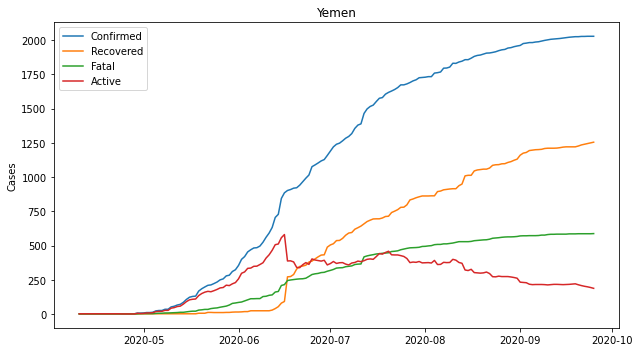

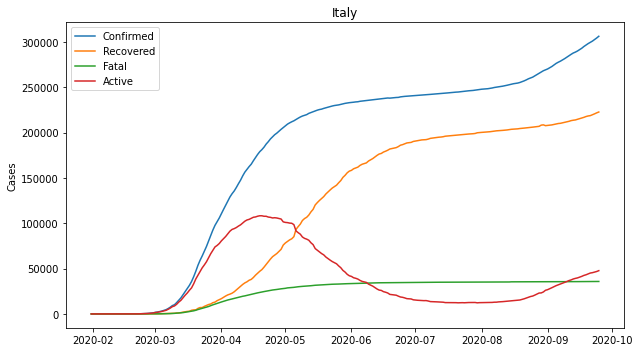

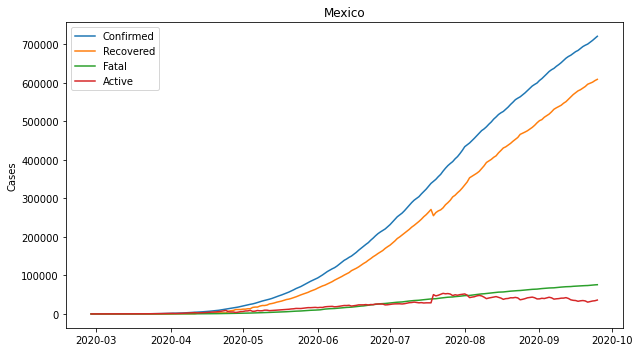

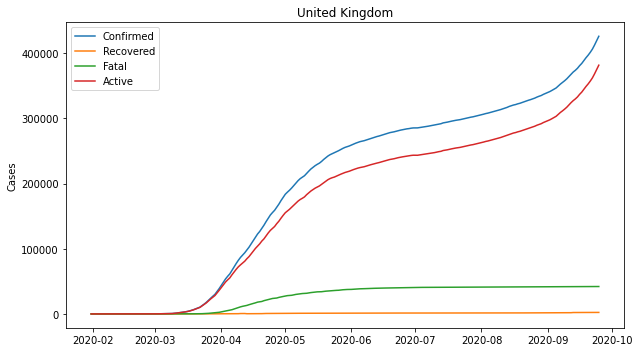

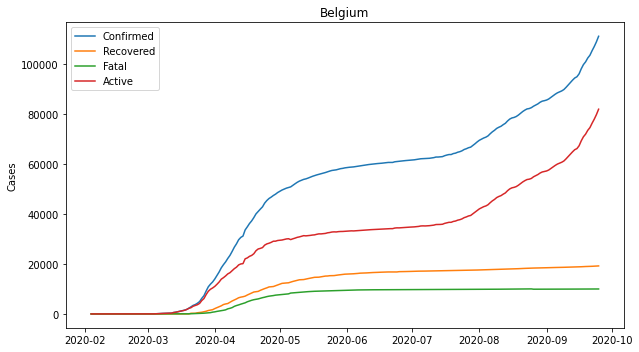

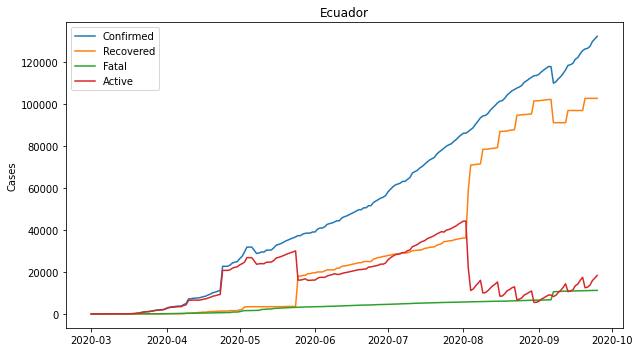

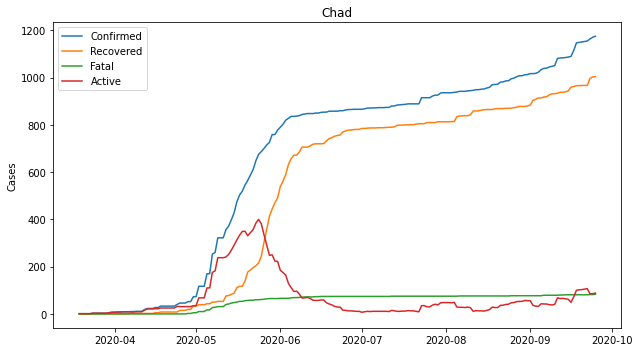

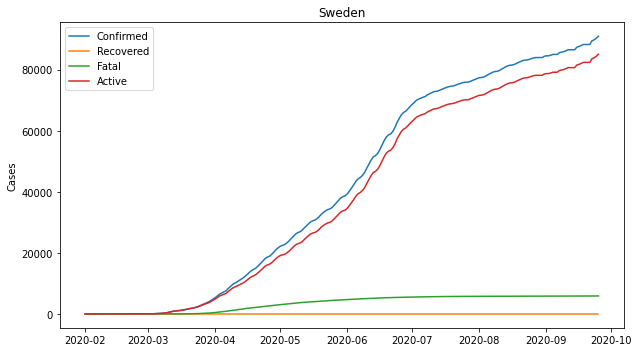

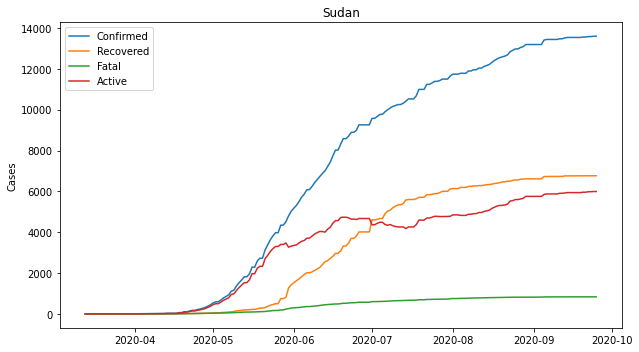

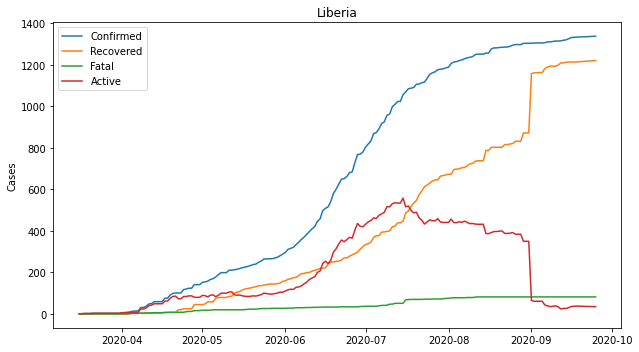

In [6]:
high_mort = get_high_mort(country_stats)
for country in list(high_mort['Country']):
    country_plot_cases(country=country)    

Additionaly we inspect other countries.

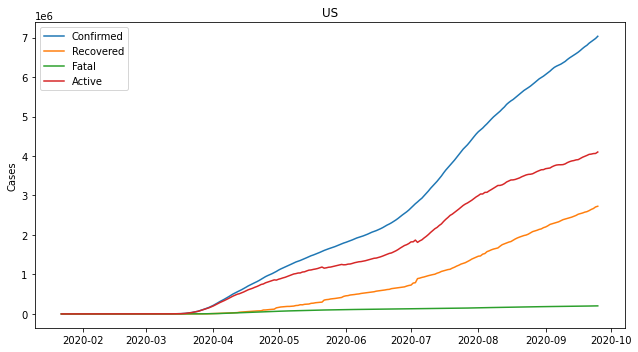

In [7]:
country_plot_cases(country='US')

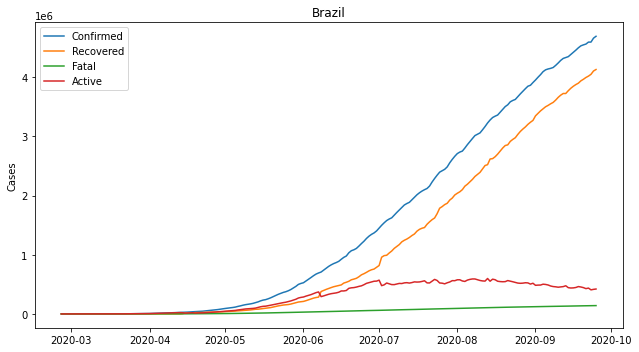

In [8]:
country_plot_cases(country='Brazil')

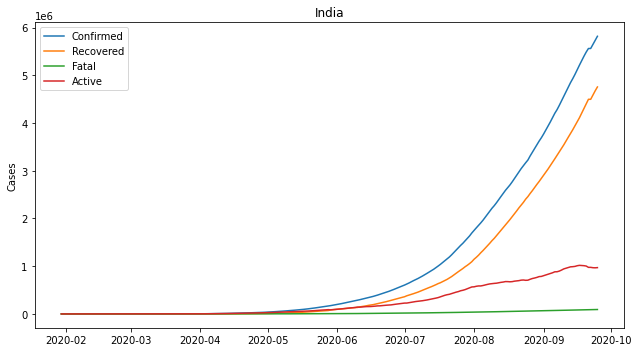

In [9]:
country_plot_cases(country='India')

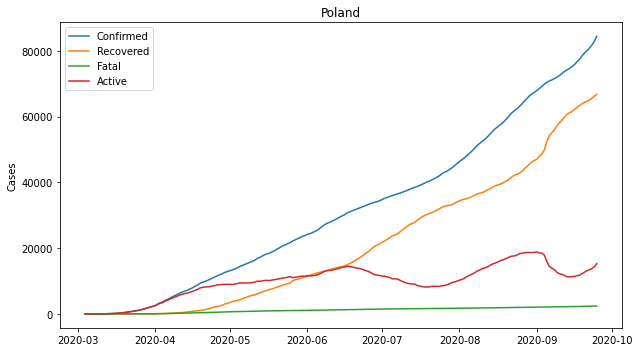

In [10]:
country_plot_cases(country='Poland')

## Daily change in cases

We plot the daily increase in cases for specific countries.

In [11]:
def country_plot_chg(country, n=7):
    """
    
    Plot country level change in cases with
    n day moving average.
    
    """
    names = ['Confirmed Chg']
    dataframes= [conf_diff]        
    
    df = get_country_ts(country=country, dataframes=dataframes, columns=names)
    df = df.rename(columns={'Confirmed Chg': 'New cases'})
    
    plt.plot(df['Date'], df['New cases'],
             label='New cases', alpha=1/2)
    
    plt.fill_between(df['Date'], y1=0, y2=df['New cases'], alpha=1/4)
    
    plt.plot(df['Date'], df['New cases'].rolling(n).mean(), 
             label=f'{n} day average', c='black')    
    
    plt.title(f'{country} - daily new cases')
    plt.ylabel('Cases')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()  

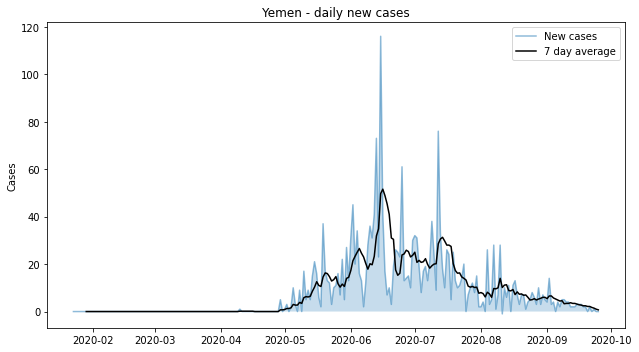

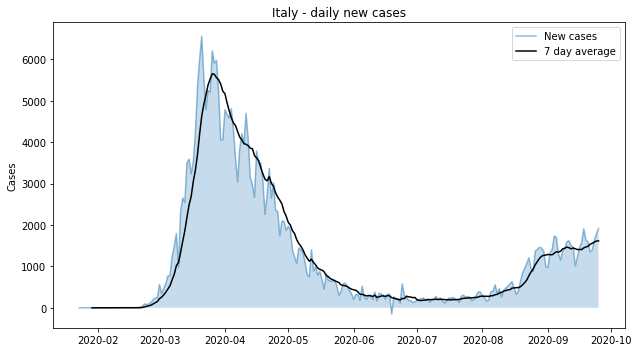

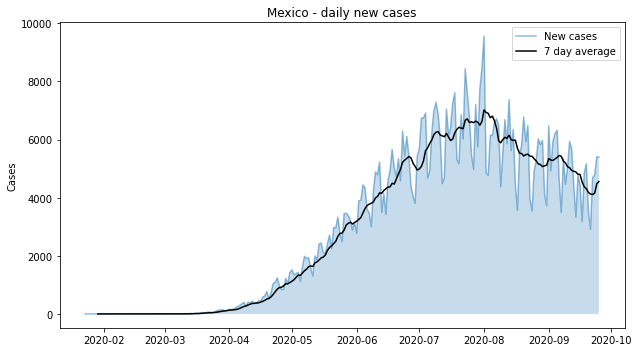

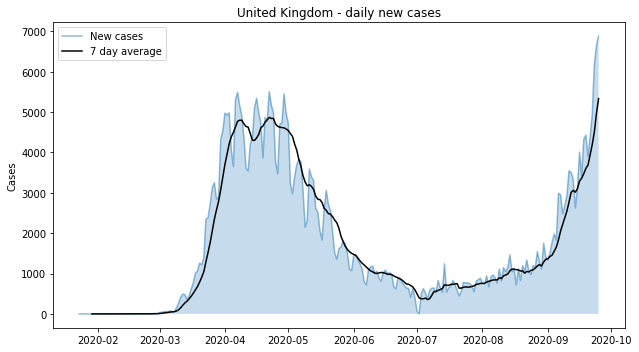

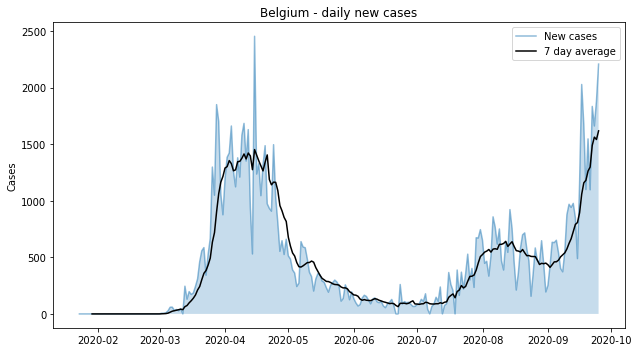

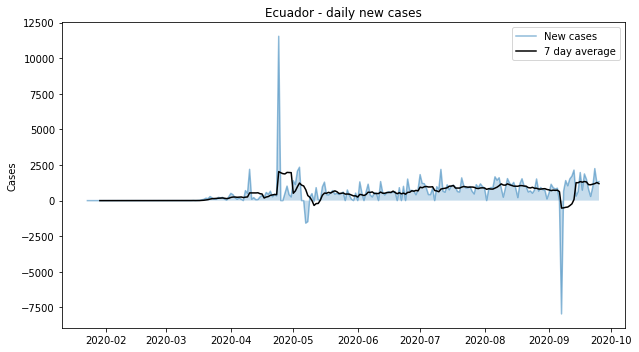

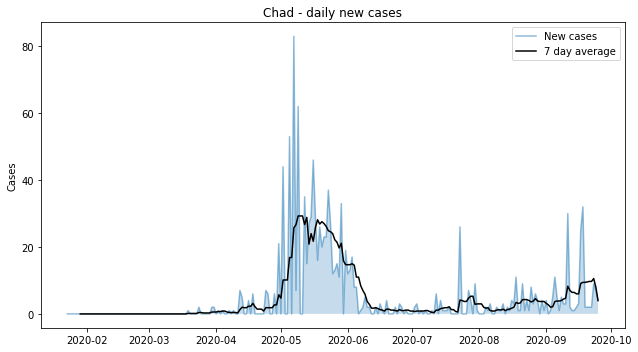

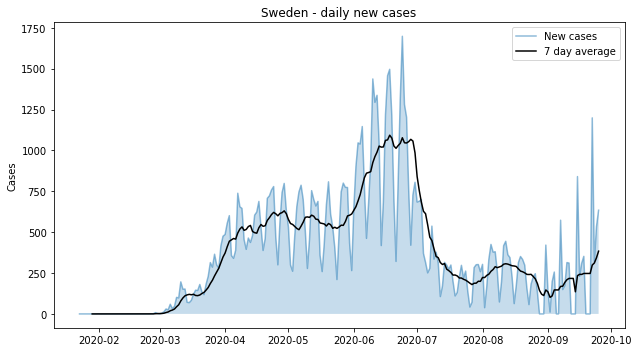

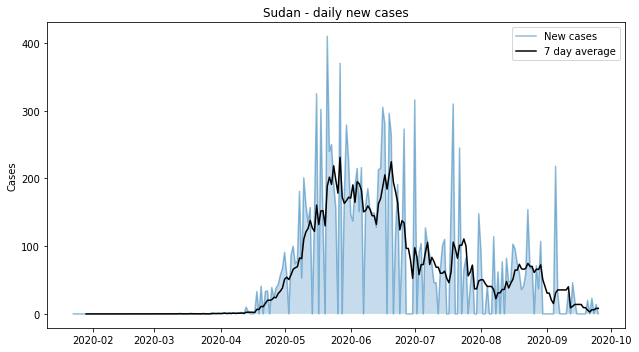

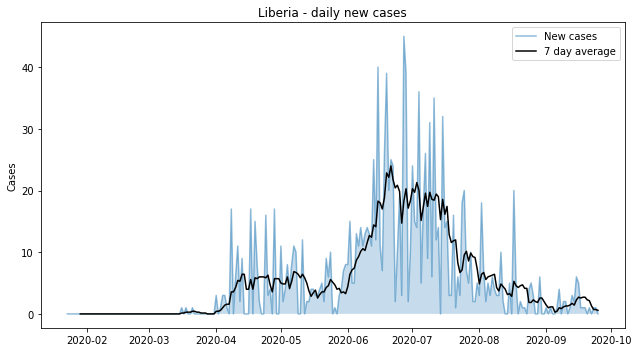

In [12]:
for country in list(high_mort['Country']):
    country_plot_chg(country=country)    